# Deep SmartGrid

In [1]:
import scipy.io as scpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE
import scipy.optimize as opt
import glob
import sys
import os
import theano.tensor as T
from theano import function
from theano import shared
import theano
from theano.tensor.signal import downsample
from theano.tensor.nnet import conv

#np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Layer, Reshape, Merge #,AutoEncoder
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Convolution1D,MaxPooling1D,UpSampling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import keras.utils.visualize_util as vutil
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.regularizers import l1, l2, l1l2, activity_l2, activity_l1
#import keras.layers.containers as containers
from keras.layers.noise import GaussianNoise
from keras.regularizers import ActivityRegularizer
from keras import backend as K
import keras.utils.visualize_util as vutil
from keras.models import model_from_json
from keras.utils.visualize_util import plot #, to_graph

from IPython.display import SVG

np.set_printoptions(suppress=True)  #Supress exponent of the number 2e-2 == 0.02

%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
Using Theano backend.


In [2]:
#Ref: http://deeplearning.net/, https://www.kaggle.com/wiki/Tutorials etc..

#caso_I.mat, caso_II.mat, caso_III.mat, caso_base.mat, consumer_data.xlsx

#print(os.getcwd() + "\n")
#print os.listdir(os.getcwd())
dataSmartGrid = scpy.loadmat('demcliMat.mat')
print type(dataSmartGrid)

<type 'dict'>


In [3]:
data = dataSmartGrid['demcliMat']
print data.shape
print data

(12180, 13)
[[ 343.33881535  292.94608369  317.56346931 ...,    0.            0.            2.        ]
 [ 229.55690517  183.19172676    0.         ...,    0.            0.            2.        ]
 [ 106.98249046   79.89465389   60.93378272 ...,   50.91543646
    44.87156581    1.        ]
 ..., 
 [ 232.28249497  135.43054     200.91859872 ...,  187.78214091
   191.41443704    0.        ]
 [ 239.19601078  206.37272444  174.6964434  ...,  297.67230497
   202.62736538    0.        ]
 [ 277.38010202  209.01016123  277.00169283 ...,  146.70298371
   309.63963308    0.        ]]


In [4]:
np.unique(data[:,-1:])

array([ 0.,  1.,  2.])

In [5]:
X = data[:,0:-1]
Y = data[:,-1]

print X.shape, Y.shape

(12180, 12) (12180,)


In [6]:
#print X.shape
Y1 = Y
Y1[Y1==2] = 1
print Y1.shape

(12180,)


In [7]:
np.unique(Y1)

array([ 0.,  1.])

In [8]:
X_DF = pd.DataFrame(X)
type(X_DF)

pandas.core.frame.DataFrame

array([[<matplotlib.axes.AxesSubplot object at 0x7f91b0653710>,
        <matplotlib.axes.AxesSubplot object at 0x7f90fea49250>]], dtype=object)

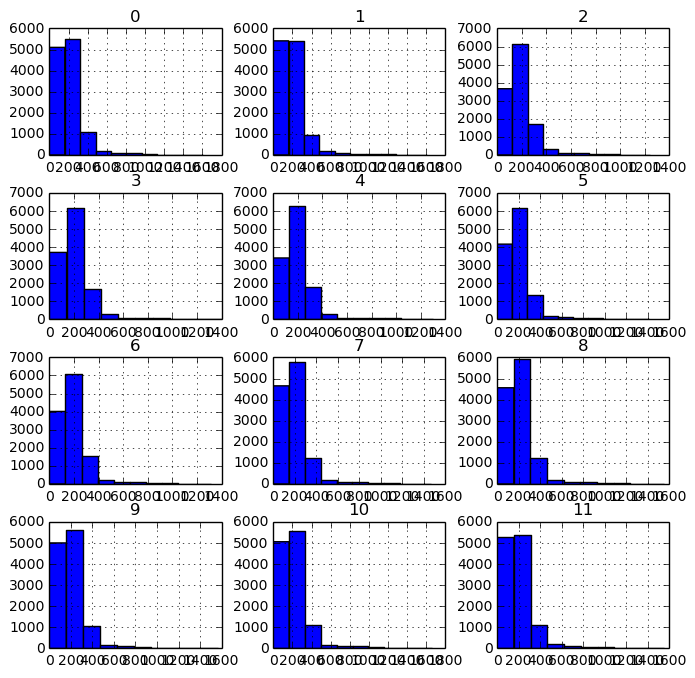

In [9]:
X_DF.hist(figsize=(8,8))
#aa.savefig('histogram.png')

array([[<matplotlib.axes.AxesSubplot object at 0x7f8a71ce3750>,
        <matplotlib.axes.AxesSubplot object at 0x7f89f69792d0>]], dtype=object)

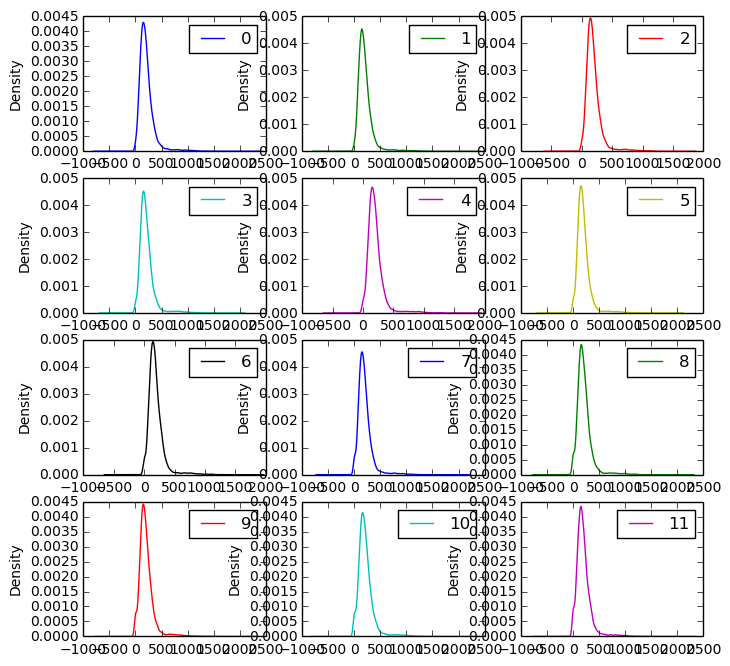

In [10]:
X_DF.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(8,8))

array([[<matplotlib.axes.AxesSubplot object at 0x7f8a8ab907d0>,
        <matplotlib.axes.AxesSubplot object at 0x7f89f6087cd0>]], dtype=object)

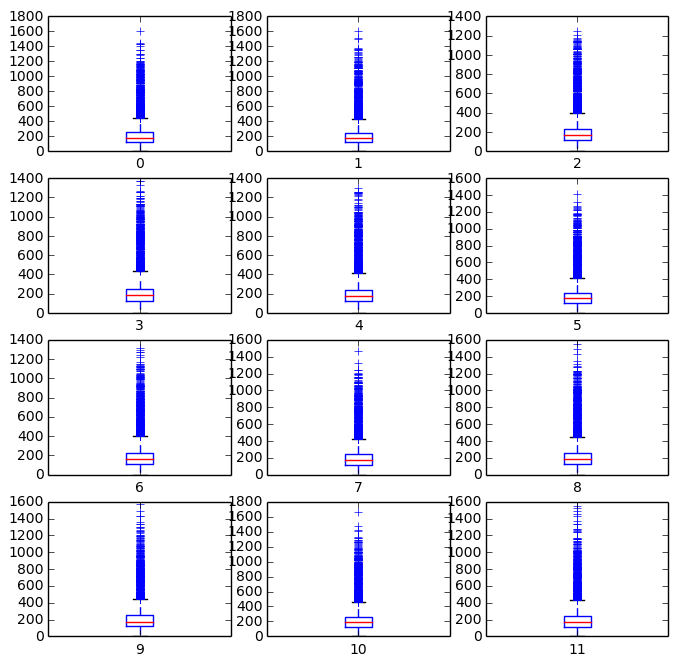

In [11]:
X_DF.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(8,8))

In [12]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes.AxesSubplot object at 0x7f0394964150>,
        <matplotlib.axes.AxesSubplot object at 0x7f038c5a6490>]], dtype=object)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


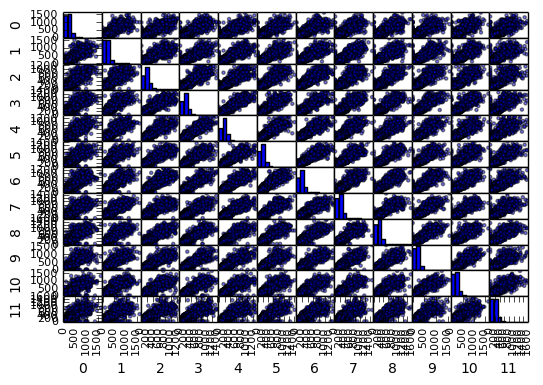

In [13]:
scatter_matrix(X_DF)

In [10]:
correlations = X_DF.corr()

<matplotlib.colorbar.Colorbar instance at 0x7f90fc727cb0>

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


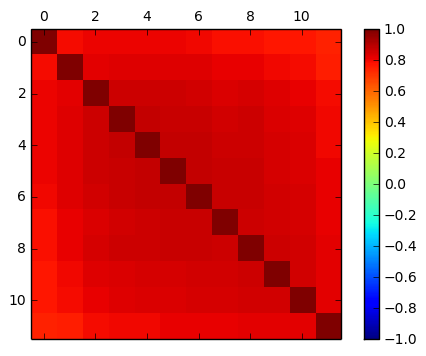

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

In [12]:
852/(852+11328.0) * 100

6.995073891625616

In [13]:
print np.sum(Y1==0), np.sum(Y1==1)

11328 852


In [14]:
print np.sum(y_train==0), np.sum(y_train==1)
print np.sum(y_test==0), np.sum(y_test==1)

NameError: name 'y_train' is not defined

In [15]:
#print data[0:5,:]
#print data[0:5,0:-1]
#print data[0:5,-1]


#print X
#print Y
#Splitting data into train and testing. 70% Training and 30% Testing..
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=4)

In [16]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape
#print numpy.unique(Y_test)

(8526, 12) (8526,) (3654, 12) (3654,)


In [26]:
#Random Forest Classification

randForest = RandomForestClassifier(1)
randForest.fit(X_train,y_train)
Y_randForestPred = randForest.predict(X_test)
print metrics.accuracy_score(y_test, Y_randForestPred)

0.943076081007


In [27]:
target_names = ['class 0', 'class 1']

print(classification_report(y_test, Y_randForestPred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      0.97      0.97      3402
    class 1       0.58      0.63      0.60       252

avg / total       0.95      0.94      0.94      3654



In [28]:
#Confusion matrix
conf = metrics.confusion_matrix(y_test,Y_randForestPred)
print conf

[[3288  114]
 [  94  158]]


In [29]:
print metrics.roc_auc_score(y_test, Y_randForestPred)

0.796737213404


In [30]:
#Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
Y_treePred = clf.predict(X_test)
print metrics.accuracy_score(y_test, Y_treePred)

0.940886699507


In [31]:
target_names = ['class 0', 'class 1']

print(classification_report(y_test, Y_treePred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      0.97      0.97      3402
    class 1       0.57      0.60      0.58       252

avg / total       0.94      0.94      0.94      3654



In [32]:
print metrics.roc_auc_score(y_test, Y_treePred)

0.784538506761


In [35]:
type(Y_treePred)

numpy.ndarray

In [36]:
import pickle

In [38]:
#Save
with open('Y_treePred.pickle', 'wb') as handle:
  pickle.dump(Y_treePred, handle)

with open('Y_randForestPred.pickle', 'wb') as handle1:
  pickle.dump(Y_randForestPred, handle1)


In [182]:
with open('y_test.pickle', 'wb') as handle1:
  pickle.dump(y_test, handle1)

In [39]:
#Load
with open('filename.pickle', 'rb') as handle:
  b = pickle.load(handle)

IOError: [Errno 2] No such file or directory: 'filename.pickle'

In [204]:
Y_treePred_prob = clf.predict_proba(X_test)[:,1]
Y_randForestPred_prob = randForest.predict_proba(X_test)[:,1]

In [217]:

#Logistic Regression-sklearn
'''
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
Y_logPred = logReg.predict(X_test)
print metrics.accuracy_score(y_test,Y_logPred)
Y_logPred_prob = logReg.predict_proba(X_test)[:,1]
'''

'\nlogReg = LogisticRegression()\nlogReg.fit(X_train,y_train)\nY_logPred = logReg.predict(X_test)\nprint metrics.accuracy_score(y_test,Y_logPred)\nY_logPred_prob = logReg.predict_proba(X_test)[:,1]\n'

In [205]:
#Combine Decision Tree & Random Forest Roc Curve

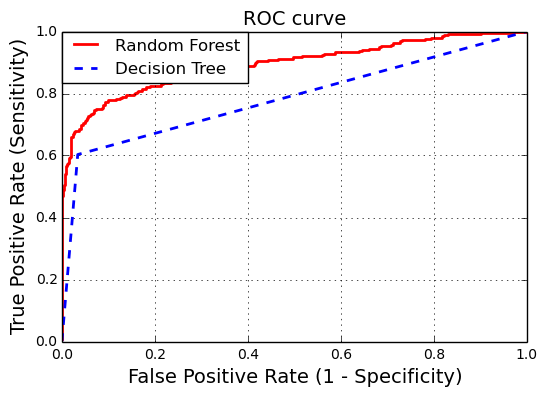

In [214]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_logPred_prob)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, Y_treePred)
#fpr2, tpr2, thresholds2 = metrics.roc_curve(test1, last100.values[:,2])

plt.plot(fpr, tpr, 'r-' ,label="Random Forest",lw=2,)
plt.plot(fpr1, tpr1,'b--' ,label="Decision Tree",lw=2,)
#plt.plot(fpr2, tpr2, '*' ,label="Last-1000",lw=2,)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 0.9, 0.4, .1), mode="expand", borderaxespad=0.)
#plt.savefig('bipolar_cnn_roc_1000.tiff',dpi=300)

In [66]:
model0 = None

In [67]:
batch_size = 200
nb_classes = 2
nb_epoch = 300

# the data, shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = X_train, X_test, Y_train, Y_test

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model0 = Sequential()
model0.add(Dense(10, input_dim=12))
model0.add(Activation('relu'))
model0.add(Dropout(0.5))

model0.add(Dense(8))
model0.add(Activation('relu'))
model0.add(Dropout(0.5))

model0.add(Dense(6))
model0.add(Activation('relu'))
model0.add(Dropout(0.5))

model0.add(Dense(nb_classes))
model0.add(Activation('sigmoid'))

rms = RMSprop()
model0.compile(loss='binary_crossentropy', optimizer=rms)

hist  = model0.fit(X_train, Y_train,
          batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=2,
          validation_data=(X_test, Y_test))
score = model0.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)

print('Test accuracy:', score[1])
print('Test score:', score[0])

(8526, 'train samples')
(3654, 'test samples')
Train on 8526 samples, validate on 3654 samples
Epoch 1/300
0s - loss: 2.3868 - val_loss: 0.6582
Epoch 2/300
0s - loss: 1.6865 - val_loss: 0.7437
Epoch 3/300
0s - loss: 1.3236 - val_loss: 0.8031
Epoch 4/300
0s - loss: 1.0160 - val_loss: 0.7971
Epoch 5/300
0s - loss: 0.7643 - val_loss: 0.7409
Epoch 6/300
0s - loss: 0.6793 - val_loss: 0.7062
Epoch 7/300
0s - loss: 0.6163 - val_loss: 0.6466
Epoch 8/300
0s - loss: 0.6395 - val_loss: 0.5876
Epoch 9/300
0s - loss: 0.5621 - val_loss: 0.5362
Epoch 10/300
0s - loss: 0.5669 - val_loss: 0.4304
Epoch 11/300
0s - loss: 0.5022 - val_loss: 0.3720
Epoch 12/300
0s - loss: 0.4791 - val_loss: 0.3060
Epoch 13/300
0s - loss: 0.4468 - val_loss: 0.3090
Epoch 14/300
0s - loss: 0.4317 - val_loss: 0.3068
Epoch 15/300
0s - loss: 0.3886 - val_loss: 0.3030
Epoch 16/300
0s - loss: 0.3796 - val_loss: 0.2974
Epoch 17/300
0s - loss: 0.3643 - val_loss: 0.2783
Epoch 18/300
0s - loss: 0.3354 - val_loss: 0.2644
Epoch 19/300
0

IndexError: invalid index to scalar variable.

In [68]:
1-score

0.84286908899165269

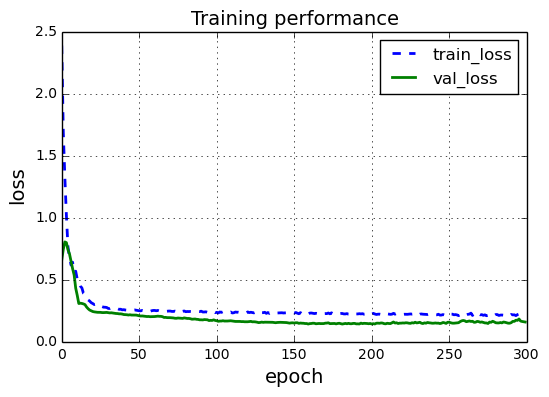

In [69]:
plt.figure()
plt.title('Training performance',fontsize=14)
plt.plot(hist.epoch, hist.history['loss'],'--', label='train_loss', lw=2)
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss', lw=2)
plt.legend()
plt.xlabel('epoch', fontsize=14)
plt.ylabel('loss', fontsize=14)

plt.grid(True)
#plt.savefig('smartgrid_nn_loss.png')

In [70]:
Y_preds_prob_nn = model0.predict_proba(X_test, verbose=0)
print(Y_preds_prob_nn[:5])

[[ 0.91878879  0.08141539]
 [ 0.97227645  0.02784843]
 [ 0.9690007   0.03113271]
 [ 0.96615601  0.03398421]
 [ 0.93430614  0.06588534]]


In [71]:
Y_preds_nn = model0.predict_classes(X_test, verbose=0)
print(Y_preds_nn[:10])

[0 0 0 0 0 0 0 0 0 0]


In [72]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(y_test,Y_preds_nn)
#plt.imshow(conf)
print conf

[[3395    7]
 [ 113  139]]


In [73]:
print 3402/(3402.+141) #sensitivity
print 111/(0+111)      #specificity

print 3402/(3402.+141)
print (3397+127)/(3397.0+127+5+125)

0.960203217612
1
0.960203217612
0.964422550629


In [74]:
target_names = ['class 0', 'class 1']

print(classification_report(y_test, Y_preds_nn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      1.00      0.98      3402
    class 1       0.95      0.55      0.70       252

avg / total       0.97      0.97      0.96      3654



In [79]:
#Save
with open('Y_preds_prob_nn.pickle', 'wb') as handle:
  pickle.dump(Y_preds_prob_nn, handle)

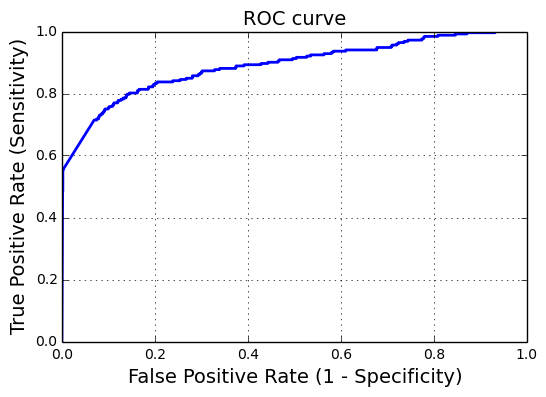

In [80]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, Y_preds_prob_nn[:,1])
plt.plot(fpr3, tpr3, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_nn_roc.png')


In [81]:
thresholds

array([ 2.        ,  1.        ,  0.99999321,  0.99698788,  0.94938606,
        0.78196764,  0.66219634,  0.30801606,  0.22872061,  0.08145642,
        0.08141539,  0.08071139,  0.08070705,  0.08015687,  0.08013741,
        0.08011935,  0.08010879,  0.07987992,  0.07979519,  0.07946289,
        0.07945075,  0.07900369,  0.07899691,  0.078738  ,  0.07873143,
        0.07865451,  0.07863011,  0.07857344,  0.07853313,  0.0777213 ,
        0.07768161,  0.07730604,  0.07729019,  0.07653253,  0.07649375,
        0.07627624,  0.07625006,  0.07624045,  0.07623379,  0.07547483,
        0.07546325,  0.07539847,  0.07538333,  0.07475839,  0.07470917,
        0.07438383,  0.07437234,  0.07388852,  0.07386891,  0.07386053,
        0.07385512,  0.07366711,  0.07365904,  0.07341582,  0.07337476,
        0.07201046,  0.07199608,  0.07195555,  0.07195333,  0.07168532,
        0.07165664,  0.07031813,  0.07031804,  0.07026677,  0.07023645,
        0.06953834,  0.06949177,  0.06937262,  0.06931167,  0.06

In [114]:
print metrics.roc_auc_score(y_test, Y_preds_prob_nn[:,1])
#thresholds

0.890481672779


In [115]:
#Will print layer shape..
def print_layers_shapes(model):
    for l in model.layers:
        print("{} : {} : {}".format(type(l), l.input_shape, l.output_shape))

In [116]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(8526, 12) (8526,) (3654, 12) (3654,)


In [117]:
X_train_1 = X_train.reshape(8526,12,1)
X_test_1 = X_test.reshape(3654,12,1)

print X_train_1.shape, X_test_1.shape 

(8526, 12, 1) (3654, 12, 1)


In [121]:
model = None

In [122]:
# 1D conv

# set parameters:
batch_size = 20
input_length = X_train_1.shape[1]
nb_epoch = 200
nb_classes = 2

print('Build model...')

model = Sequential()

model.add(Convolution1D(nb_filter=64,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu',
                        input_dim=1, 
                        input_length=input_length)) 
                       
model.add(Convolution1D(nb_filter=32,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))
                        
model.add(MaxPooling1D(pool_length=2))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='valid',
                        activation='relu'))

model.add(Convolution1D(nb_filter=16,
                        filter_length=3,
                        border_mode='same',
                        activation='relu'))

model.add(MaxPooling1D(pool_length=2))

# Adding GRU layer 
#model.add(GRU(output_dim=14))
#model.add(Activation('relu'))

#print_layers_shapes(model)

model.add(Flatten())

model.add(Dense(10))
model.add(Dropout(0.25))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(nb_classes)) 
model.add(Activation('sigmoid'))

#print_layers_shapes(model)

rms = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=rms)



print('Train...')
history = model.fit(X_train_1, Y_train, batch_size=batch_size,
          nb_epoch=nb_epoch, show_accuracy=True,
          validation_data=(X_test_1, Y_test),verbose=2)

score, acc = model.evaluate(X_test_1, Y_test, batch_size=batch_size,
                            show_accuracy=True)

print('Test accuracy:', acc)
print('Test score:', score)

Build model...
Train...
Train on 8526 samples, validate on 3654 samples
Epoch 1/200
3s - loss: 0.2705 - val_loss: 0.1979
Epoch 2/200
3s - loss: 0.2029 - val_loss: 0.1371
Epoch 3/200
3s - loss: 0.1776 - val_loss: 0.1353
Epoch 4/200
3s - loss: 0.1718 - val_loss: 0.1491
Epoch 5/200
3s - loss: 0.1684 - val_loss: 0.1234
Epoch 6/200
3s - loss: 0.1646 - val_loss: 0.1256
Epoch 7/200
3s - loss: 0.1618 - val_loss: 0.1333
Epoch 8/200
3s - loss: 0.1552 - val_loss: 0.1226
Epoch 9/200
3s - loss: 0.1539 - val_loss: 0.1166
Epoch 10/200
3s - loss: 0.1522 - val_loss: 0.1188
Epoch 11/200
3s - loss: 0.1461 - val_loss: 0.2552
Epoch 12/200
3s - loss: 0.1479 - val_loss: 0.1177
Epoch 13/200
3s - loss: 0.1483 - val_loss: 0.1177
Epoch 14/200
3s - loss: 0.1459 - val_loss: 0.1107
Epoch 15/200
3s - loss: 0.1436 - val_loss: 0.1200
Epoch 16/200
3s - loss: 0.1453 - val_loss: 0.1167
Epoch 17/200
3s - loss: 0.1434 - val_loss: 0.1167
Epoch 18/200
3s - loss: 0.1453 - val_loss: 0.1120
Epoch 19/200
3s - loss: 0.1438 - val_

TypeError: 'numpy.float64' object is not iterable

In [123]:
#vutil.plot(model, to_file='smartgrid_cnn1d.png')
#vutil.plot(autoencoder, recursive=True, show_shape=True).create(prog='dot', format="png")
#SVG(vutil.to_graph(model, recursive=True, show_shape=True).create(prog='dot', format="svg"))

#graph = to_graph(model, show_shape=True)
#graph.write_png("smartgrid_cnn1D.png")

In [124]:
from keras.utils.visualize_util import plot
#plot(model, to_file='SmartGridCnn1D.png', show_shapes=True)

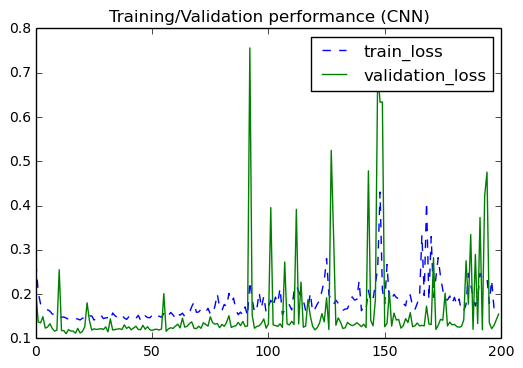

In [125]:
plt.figure()
plt.title('Training/Validation performance (CNN)')
plt.plot(history.epoch, history.history['loss'],'--', label='train_loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation_loss')
plt.legend()

In [126]:
Y_preds_prob_cnn = model.predict_proba(X_test_1, verbose=0)
print(Y_preds_prob_cnn[:5])

[[ 0.95344847  0.04608257]
 [ 1.          0.        ]
 [ 0.95975184  0.03963637]
 [ 0.98310274  0.01756002]
 [ 0.97571099  0.02461227]]


In [127]:
Y_preds_cnn = model.predict_classes(X_test_1, verbose=0)
print(Y_preds_cnn)

[0 0 0 ..., 0 0 0]


In [128]:
np.unique(Y_preds_cnn) #[-550:]

array([0, 1])

In [129]:
np.unique(y_test)

array([ 0.,  1.])

In [130]:
print np.sum(Y_preds_cnn==1)
print 3386+89

151
3475


In [131]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(y_test,Y_preds_cnn)
#plt.imshow(conf)
print conf

[[3401    1]
 [ 102  150]]


In [132]:
(3387+159)/(3387+159+15+93.0)

0.9704433497536946

In [133]:
target_names = ['class 0', 'class 1']

print(classification_report(y_test, Y_preds_cnn, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      1.00      0.99      3402
    class 1       0.99      0.60      0.74       252

avg / total       0.97      0.97      0.97      3654



In [135]:
#Save
with open('Y_preds_prob_cnn.pickle', 'wb') as handle:
  pickle.dump(Y_preds_prob_cnn, handle)

In [200]:
#Y_preds_prob_cnn[:15]

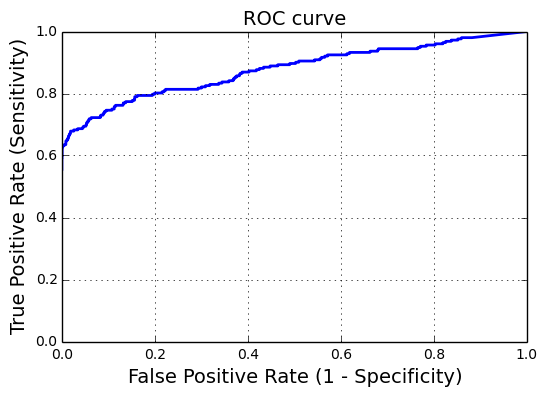

In [136]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr4, tpr4, thresholds = metrics.roc_curve(y_test, Y_preds_prob_cnn[:,1])
plt.plot(fpr4, tpr4, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_cnn1d_roc.png')

#Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

In [137]:
print metrics.roc_auc_score(y_test, Y_preds_prob_cnn[:,1])

0.87708152534


In [138]:
#LSTM
model2 = None

In [139]:
rms = RMSprop()


model2 = Sequential()
model2.add(LSTM(64, return_sequences=True,
               input_shape = (12 , 1) )  ) # returns a sequence of vectors of dimension 32
model2.add(Dropout(.25))
model2.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model2.add(Dropout(.25))
model2.add(LSTM(64))  # return a single vector of dimension 32
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='binary_crossentropy', optimizer=rms, metrics=["accuracy"] )

model2.fit(X_train_1, Y_train,
          batch_size=64, nb_epoch=100,
          validation_data=(X_test_1, Y_test),show_accuracy=True)

Train on 8526 samples, validate on 3654 samples
Epoch 1/100
8526/8526 [==============================] - 8s - loss: 0.1746 - acc: 0.9570 - val_loss: 0.1436 - val_acc: 0.9663
Epoch 2/100
8526/8526 [==============================] - 9s - loss: 0.1532 - acc: 0.9641 - val_loss: 0.1316 - val_acc: 0.9699
Epoch 3/100
8526/8526 [==============================] - 9s - loss: 0.1477 - acc: 0.9656 - val_loss: 0.1832 - val_acc: 0.9699
Epoch 4/100
8526/8526 [==============================] - 8s - loss: 0.1470 - acc: 0.9656 - val_loss: 0.1329 - val_acc: 0.9699
Epoch 5/100
8526/8526 [==============================] - 9s - loss: 0.1459 - acc: 0.9655 - val_loss: 0.1284 - val_acc: 0.9699
Epoch 6/100
8526/8526 [==============================] - 8s - loss: 0.1433 - acc: 0.9656 - val_loss: 0.1303 - val_acc: 0.9699
Epoch 7/100
8526/8526 [==============================] - 9s - loss: 0.1426 - acc: 0.9658 - val_loss: 0.1239 - val_acc: 0.9702
Epoch 8/100
8526/8526 [==============================] - 8s - loss: 0.

In [140]:
Y_preds_lstm = model2.predict_classes(X_test_1, verbose=0)
print(Y_preds_lstm)

[0 0 0 ..., 0 0 0]


In [141]:
Y_preds_prob_lstm = model2.predict_proba(X_test_1, verbose=0)
print(Y_preds_prob_lstm[:5])

[[ 0.93816173  0.0618383 ]
 [ 0.99131352  0.00868648]
 [ 0.9840613   0.01593871]
 [ 0.99071527  0.00928469]
 [ 0.9678486   0.03215143]]


In [142]:
#Confusion matrix of logistic regression
conf = metrics.confusion_matrix(y_test,Y_preds_lstm)
#plt.imshow(conf)
print conf

[[3400    2]
 [ 100  152]]


In [143]:

target_names = ['class 0', 'class 1']

print(classification_report(y_test, Y_preds_lstm, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.97      1.00      0.99      3402
    class 1       0.99      0.60      0.75       252

avg / total       0.97      0.97      0.97      3654



In [147]:
#Save
with open('Y_preds_prob_lstm.pickle', 'wb') as handle:
  pickle.dump(Y_preds_prob_lstm, handle)

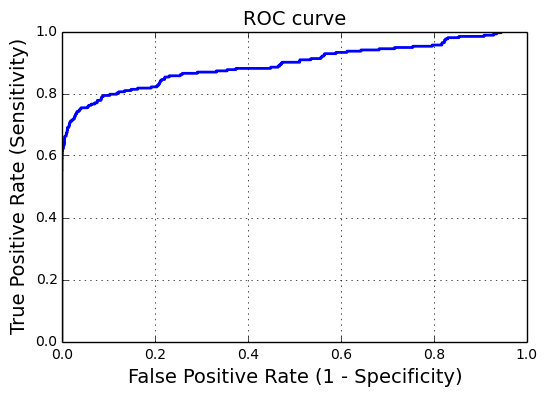

In [148]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr5, tpr5, thresholds = metrics.roc_curve(y_test, Y_preds_prob_lstm[:,1])
plt.plot(fpr5, tpr5, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_cnn1d_roc.png')

#Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

In [149]:
#SAE

In [169]:
input_size = 12
num_labels = 2
hidden_size = 196

tot_iter = 400

sparsity_param = 0.1  # desired average activation of the hidden units.
lambda_ = 3e-3  # weight decay parameter
beta = 3  # weight of sparsity penalty term

#Unlabelled Data

X_train_new = np.transpose(X_train)
X_test_new  = np.transpose(X_test)

unlabeled_data = X_train_new[ : , 4263:8525]


#Labelled Data
train_data = X_train_new[ : , 0:4262]
train_labels = y_train[0:4262]

test_data = X_test_new
test_labels = y_test

print '# examples in unlabeled set: {0:d}\n'.format(unlabeled_data.shape[1])
print '# examples in supervised training set: {0:d}\n'.format(train_data.shape[1])
print '# examples in supervised testing set: {0:d}\n'.format(test_data.shape[1])

# examples in unlabeled set: 4262

# examples in supervised training set: 4262

# examples in supervised testing set: 3654



In [170]:
print unlabeled_data.shape, train_data.shape, test_data.shape
print train_labels.shape, test_labels.shape
#print X_train_new.shape
#print X_train.shape
#print unlabeled_data.shape

(12, 4262) (12, 4262) (12, 3654)
(4262,) (3654,)


In [171]:
print input_size
print hidden_size

12
196


In [172]:
import sparse_autoencoder
import scipy.optimize
import display_network
import softmax

## ======================================================================
#  STEP 2: Train the sparse autoencoder
#  This trains the sparse autoencoder on the unlabeled training
#  images.

#  Randomly initialize the parameters
theta = sparse_autoencoder.initialize(hidden_size, input_size)

J = lambda x: sparse_autoencoder.sparse_autoencoder_cost(x, input_size, hidden_size,
                                                         lambda_, sparsity_param,
                                                         beta, unlabeled_data)

options_ = {'maxiter': tot_iter, 'disp': True} #Was 400
result = scipy.optimize.minimize(J, theta, method='L-BFGS-B', jac=True, options=options_)
opt_theta = result.x

print result

      fun: 366301.63717683568
 hess_inv: <4912x4912 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00708247, -0.00168269, -0.00281037, ..., -0.01661039,
       -0.01920074, -0.03018068])
  message: 'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 489
      nit: 401
   status: 1
  success: False
        x: array([-2.3608241 , -0.56089751, -0.93678885, ...,  4.12101867,
        4.0639868 ,  3.88353167])


In [173]:
# Visualize the weights
W1 = opt_theta[0:hidden_size * input_size].reshape(hidden_size, input_size).transpose()
#display_network.display_network(W1,filename='STL_Weights.png')

##======================================================================
## STEP 3: Extract Features from the Supervised Dataset
#
#  Train on labeled set using unlabeled weights.
#  

train_features = sparse_autoencoder.sparse_autoencoder(opt_theta, hidden_size,
                                                       input_size, train_data)

test_features = sparse_autoencoder.sparse_autoencoder(opt_theta, hidden_size,
                                                      input_size, test_data)

In [174]:
##======================================================================
## STEP 4: Train the softmax classifier

lambda_ = 1e-4
options_ = {'maxiter': tot_iter, 'disp': True}

opt_theta, input_size, num_classes = softmax.softmax_train(hidden_size, num_labels,
                                                           lambda_, train_features,
                                                           train_labels, options_)

      fun: 446.34196571059175
 hess_inv: <392x392 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00000433, -0.00146096, -0.00000462, -0.00354028, -0.00309501,
       -0.00000373, -0.00000487, -0.00104636, -0.00000476, -0.00239924,
        0.00009975, -0.00445554, -0.00311654, -0.00000418, -0.00000359,
       -0.00000432,  0.00046902, -0.00000553, -0.00000371, -0.00000485,
       -0.00000517, -0.00000362, -0.00180148, -0.00000441,  0.00094053,
       -0.0000038 , -0.00173423, -0.00396697,  0.00040935, -0.00174322,
       -0.00081403, -0.00025563, -0.00000158, -0.00441488, -0.0011449 ,
       -0.00000434, -0.00012789, -0.00000432,  0.00055372, -0.00000384,
       -0.00072264, -0.00088259, -0.00121477, -0.00013199, -0.00293981,
       -0.00000428, -0.00368241, -0.00285367, -0.00000441, -0.00000415,
       -0.00000435, -0.00033368, -0.00314771, -0.00272671, -0.00000378,
       -0.00000447, -0.00466413, -0.00056714, -0.00066323,  0.00055584,
       -0.00031257, -0.00000438, -0

In [175]:

##======================================================================
## STEP 5: Testing

predictions = softmax.softmax_predict((opt_theta, input_size, num_classes), test_features)
print "Accuracy: {0:.2f}%".format(100 * np.sum(predictions == test_labels, dtype=np.float64) / test_labels.shape[0])

Accuracy: 96.22%


In [176]:
predictions_prob_stl = softmax.softmax_predict_prob((opt_theta, input_size, num_classes), test_features)
predictions_prob_stl

array([[ 0.97096934,  0.9951112 ,  0.99881303, ...,  0.91850421,
         0.99194538,  0.94542634],
       [ 0.02903066,  0.0048888 ,  0.00118697, ...,  0.08149579,
         0.00805462,  0.05457366]])

In [177]:
predictions_prob_stl.T[:5]

array([[ 0.97096934,  0.02903066],
       [ 0.9951112 ,  0.0048888 ],
       [ 0.99881303,  0.00118697],
       [ 0.99981374,  0.00018626],
       [ 0.99234616,  0.00765384]])

In [184]:
#Save
with open('predictions_prob_stl.pickle', 'wb') as handle:
  pickle.dump(predictions_prob_stl, handle)

In [185]:
with open('test_labels.pickle', 'wb') as handle1:
  pickle.dump(test_labels, handle1)

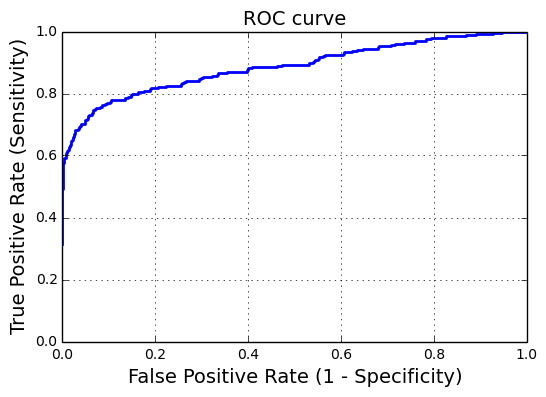

In [179]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr6, tpr6, thresholds = metrics.roc_curve(test_labels, predictions_prob_stl.T[:,1])
plt.plot(fpr6, tpr6, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)

#plt.savefig('smartgrid_cnn1d_roc.png')

#Y_logPred_prob = logReg.predict_proba(X_test)[:, 1]

In [180]:
#Combined ROC

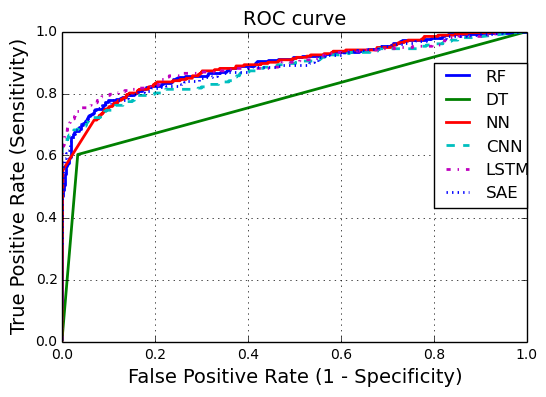

In [215]:
#ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities
#fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_randForestPred)
#fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, Y_treePred)
#fpr2, tpr2, thresholds2 = metrics.roc_curve(test1, last100.values[:,2])

plt.plot(fpr, tpr  ,label="RF",lw=2,)
plt.plot(fpr1, tpr1  ,label="DT",lw=2,)

plt.plot(fpr3, tpr3, '-' ,label="NN",lw=2,)
plt.plot(fpr4, tpr4,'--' ,label="CNN",lw=2,)
plt.plot(fpr5, tpr5, '-.' ,label="LSTM",lw=2,)
plt.plot(fpr6, tpr6,'b:' ,label="SAE",lw=2,)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve',fontsize=14)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=14) #fontweight='bold'
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=14)
plt.grid(True)
#plt.legend(['y = x', 'y = 2x', 'y = 3x', 'y = 4x'], loc='upper left')
plt.legend(bbox_to_anchor=(0.8, 0.8, 0.2, .1), mode="expand", borderaxespad=0.)
plt.savefig('smartgrid_dl_roc.png')
#plt.savefig('bipolar_cnn_roc_1000.tiff',dpi=300)

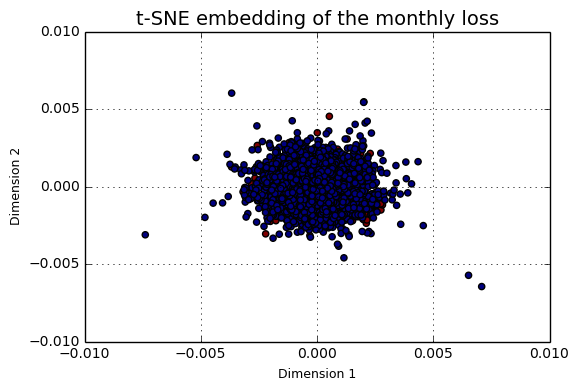

In [17]:
X_tsne = TSNE(learning_rate=100).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y1)

plt.title('t-SNE embedding of the monthly loss',fontsize=14)
plt.xlabel('Dimension 1',fontsize=9)
plt.ylabel('Dimension 2',fontsize=9)
plt.grid(True)
plt.savefig('tsne_smartgrid.png', transparent = True)

In [51]:
#print X.shape, Y1.shape

# Matlab scripts for reading the data(cell-array) and saving it into mat file..

In [ ]:
# %load mapPC2DemcliCol.m

%Function mapping from Demcli Column to pc column.
function pc_col = mapPC2DemcliCol(demcliCol)
   
   pc_col = 0;  
   if(demcliCol == 1)
      pc_col = 1;
   end
   if(demcliCol == 3)
      pc_col = 2;
   end
   if(demcliCol == 5)
      pc_col = 3;
   end   
end


In [ ]:
# %load smartgrid.m

clear all;

%files--> caso_I.mat, caso_II.mat, caso_III.mat, caso_base.mat
%addpath ../data

load data/caso_I.mat; %ccarga, demcli, pc

nRows = size(demcli,1); %85
nCols = size(demcli,2); %6

isEmptyCell = cellfun(@isempty, demcli);%returns 0,1 matrix(85 by 6)

[nCellRows, nCellCols] = cellfun(@size, demcli); %shape of individual cell
totalRows = sum(cellfun(@length, demcli)(:)); %Total rows of cells
totalCols = unique(nCellCols)(2);  %column of cell

demcliMat =  []; %zeros(totalRows,totalCols); %Holder of the cell data.
pc_col = 1;
%iterate all the cell
for i=1:nRows  %85
  for j = 1:2:nCols %since 1,3,5 only contains data   
    pc_col = mapPC2DemcliCol(j);  
    %fprintf('%i\n %i\n %i\n', i,j,pc_col);
    if(!isEmptyCell(i,j))        
        demcliMat = [demcliMat; demcli{i,j}, pc{i,pc_col}];
    end       
  end
end

%saves the file into demcliMat.mat in version 7. After version 7 file stored in hdf5
%It can be open using h5py package in python.

%save demcliMat.mat demcliMat -v7


